# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
#!pip install prophet

In [2]:
# Import the required libraries and dependencies
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
from prophet import Prophet
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

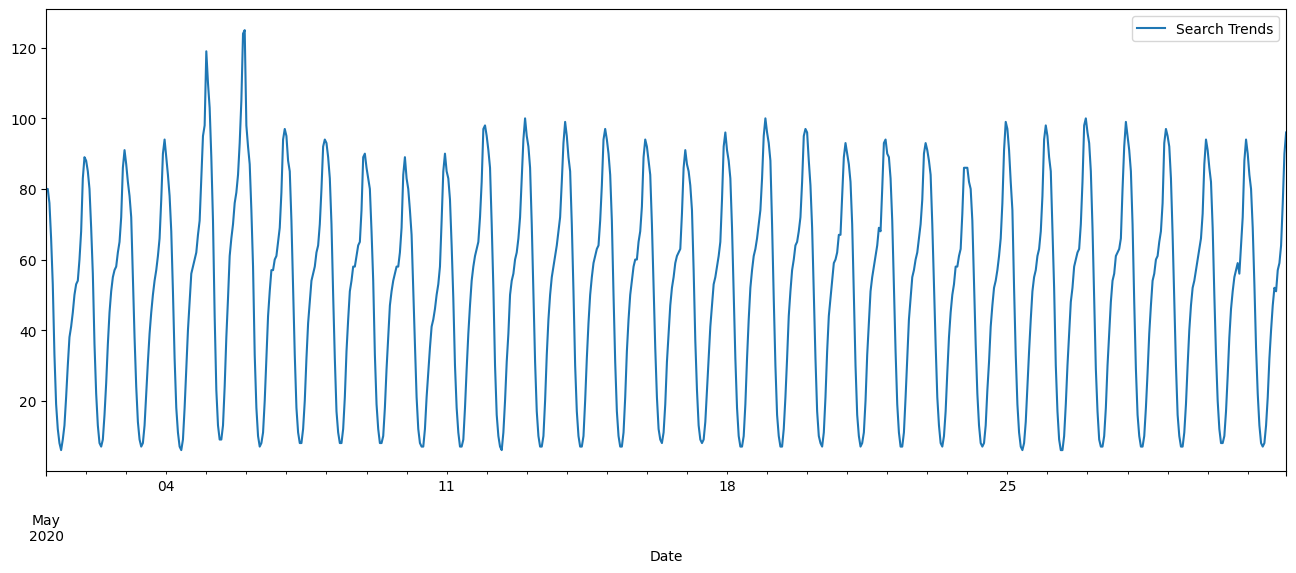

In [5]:
# Slice the DataFrame to just the month of May 2020
df_may=df_mercado_trends['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
df_may.plot(figsize = (16,6))

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
total = df_may.sum()

# View the traffic_may_2020 value
display(total)

Search Trends    38181
dtype: int64

In [7]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic_value = df_mercado_trends.groupby(by=[df_mercado_trends.index.year,df_mercado_trends.index.month])['Search Trends'].sum().median()

# View the median_monthly_traffic value
display(f'Median monthly traffic value: {median_monthly_traffic_value}')

'Median monthly traffic value: 35172.5'

In [8]:
#Traffic may 2020
traffic_may_2020 = df_may['Search Trends'].sum()
traffic_may_2020

38181

In [9]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic_value

1.0855355746677091

### **Overall Traffic**

In [10]:
overall_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year,df_mercado_trends.index.month])[['Search Trends']].sum()
overall_max_index = overall_monthly_traffic[overall_monthly_traffic['Search Trends'] == overall_monthly_traffic['Search Trends'].max()].index
overall_max_value = overall_monthly_traffic['Search Trends'].max()

### **Overall Traffic Visualization**

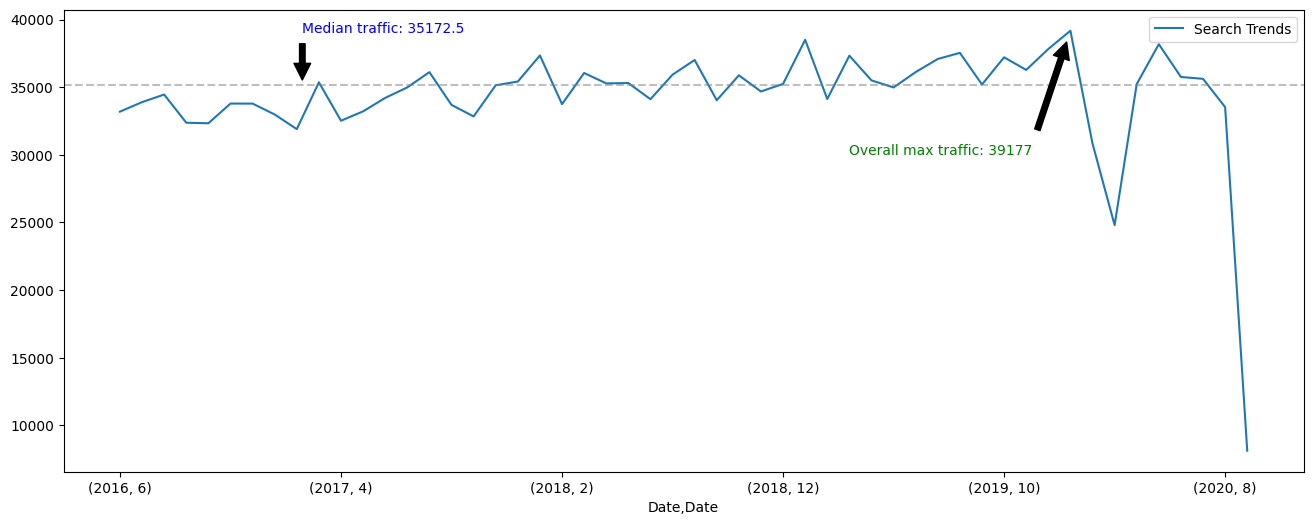

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [11]:
fig,ax = plt.subplots(figsize=(16,6))
overall_monthly_traffic.plot(figsize=(16,6),ax=ax)

# Overall Traffic annotatin
ax.annotate(f'Overall max traffic: {overall_max_value}',
            (43,overall_max_value), xytext=(33,30000),
            arrowprops=dict(facecolor='black',shrink=0.1),
            color = 'green'
            )
# Median Traffic line and annotation
plt.axhline(y=np.nanmean(median_monthly_traffic_value),color = 'grey',linestyle = '--',alpha = 0.5)

ax.annotate(f'Median traffic: {median_monthly_traffic_value}',(8.25,median_monthly_traffic_value),
              xytext = (8.25,39000),
              arrowprops=dict(facecolor='black',shrink=0.1),
              color = 'blue')
plt.show()
plt.savefig('median_traffic.png')
files.download('median_traffic.png')

### **Month of May 2020 Traffic**

In [12]:
df_2020 = df_mercado_trends['2020-1':'2020-9']
monthly_traffic_2020 = df_2020.groupby(df_2020.index.month)[['Search Trends']].sum()
max_traffic_2020 = monthly_traffic_2020['Search Trends'].max()

### **May Traffic Visaulization**

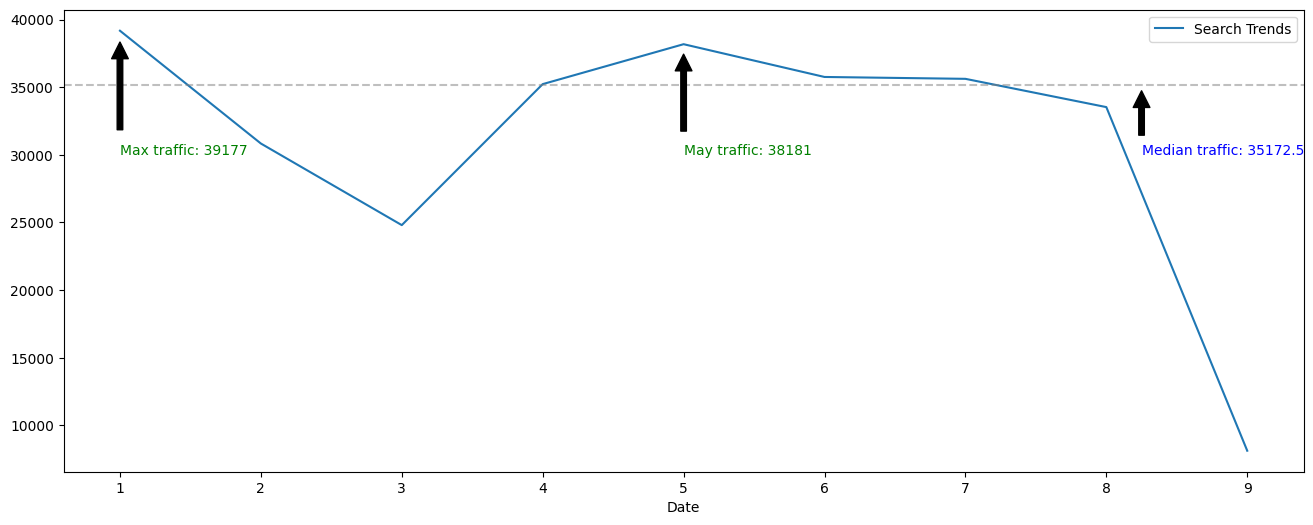

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [13]:
fig,ax_1 = plt.subplots(figsize=(16,6))
monthly_traffic_2020.plot(figsize=(16,6),ax=ax_1)

# Max traffic annotation
ax_1.annotate(f'Max traffic: {max_traffic_2020}',(1,max_traffic_2020),
              xytext=(1,30000),
            arrowprops=dict(facecolor='black',shrink=0.1),
              color = 'green')
# May Traffic annotation
ax_1.annotate(f'May traffic: {traffic_may_2020}',(5,traffic_may_2020),
              xytext = (5,30000),
              arrowprops=dict(facecolor='black',shrink=0.1),
              color = 'green')
# Median Traffic line and annotation
plt.axhline(y=np.nanmean(median_monthly_traffic_value),color = 'grey',linestyle = '--',alpha = 0.5)

ax_1.annotate(f'Median traffic: {median_monthly_traffic_value}',(8.25,median_monthly_traffic_value),
              xytext = (8.25,30000),
              arrowprops=dict(facecolor='black',shrink=0.1),
              color = 'blue')

plt.show()
plt.savefig('may_traffic.png')
files.download('may_traffic.png')

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

**The release of the financial results did increase the search traffic compared to the median and preceding months. Its worth noting that the search taffic had decreased from its highest overall traffic which was in the beginning
of the year as the figures above show.**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

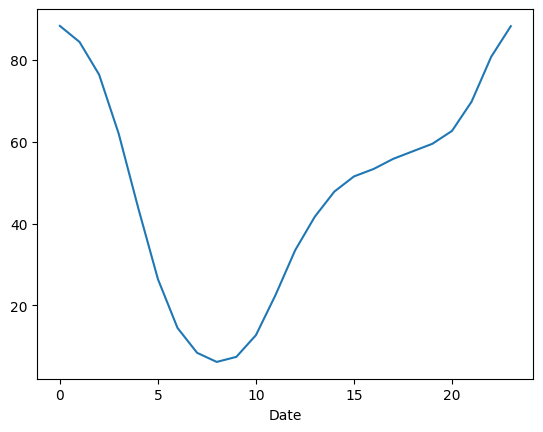

In [14]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
mean_hourly_trend = df_mercado_trends.groupby(by=df_mercado_trends.index.hour)['Search Trends'].mean()
mean_hourly_trend.plot()
plt.savefig('hourly_trend.png')
files.download('hourly_trend.png')

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

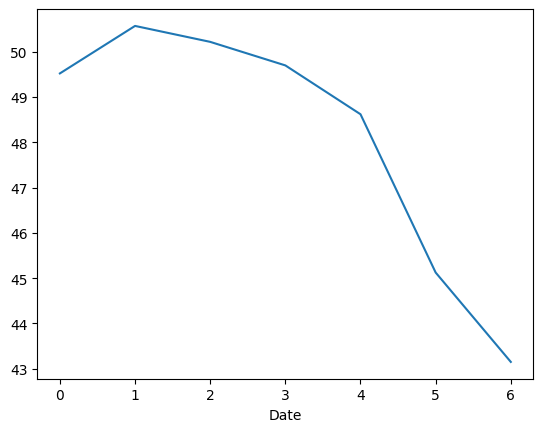

In [15]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
day_of_week_mean = df_mercado_trends.groupby(by=df_mercado_trends.index.dayofweek)['Search Trends'].mean()
day_of_week_mean.plot()

plt.savefig('day_of_week_trend.png')
files.download('day_of_week_trend.png')

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

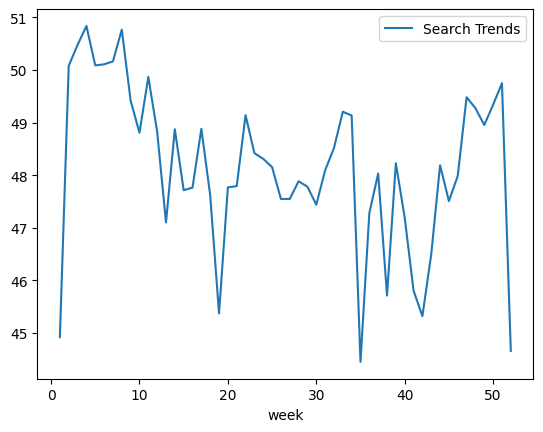

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [16]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
week_of_year_mean = df_mercado_trends.groupby(by=df_mercado_trends.index.isocalendar().week).mean()
week_of_year_mean.plot()
plt.show()

plt.savefig('week_of_year_trend.png')
files.download('week_of_year_trend.png')

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

# **Trend Analysis**
- **In the hourly analysis there is a drop in traffic from midnight until approximately 9am and then it picks up again to its previous levels.**

- **In the weekday trends there is a decline from Sunday to Saturday.**

- **Finally the weekly trends look very choppy with an overall declining trend**

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [17]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

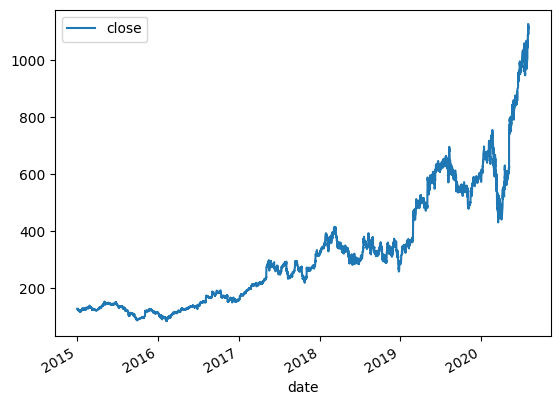

In [18]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [19]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_stock_trend = pd.concat([df_mercado_stock,df_mercado_trends],axis= 1,join='inner')

# View the first and last five rows of the DataFrame
display(df_stock_trend.head())
display(df_stock_trend.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

### **January to June 2020 Trends**

In [20]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_jan_jun = df_stock_trend['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(df_jan_jun.head())
display(df_jan_jun.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


In [21]:
med_stock = np.mean(df_jan_jun['close']).round(2)
med_stock

689.25

### **Visaulization**

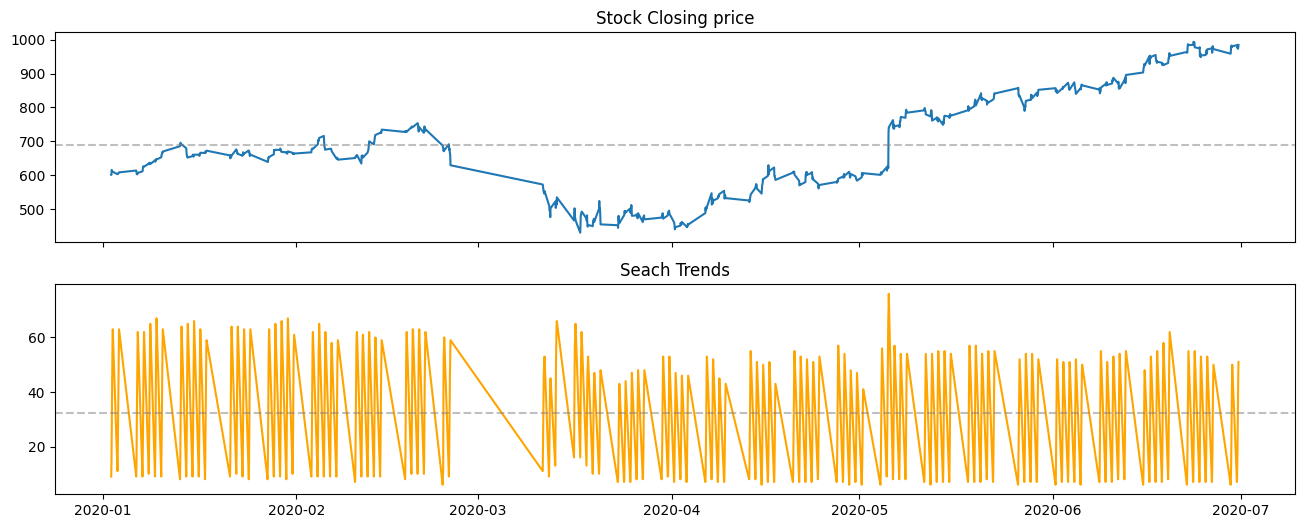

In [22]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
fig,ax = plt.subplots(nrows = 2,ncols = 1,figsize=(16,6),sharex = True)

ax[0].plot(df_jan_jun.index,df_jan_jun['close'])
ax[0].title.set_text('Stock Closing price')

# Mean Stock price
mean_stock = np.mean(df_jan_jun['close']).round(2)
ax[0].axhline(y=mean_stock,color = 'grey',linestyle = '--',alpha = 0.5)


ax[1].plot(df_jan_jun.index,df_jan_jun['Search Trends'],color='orange')
ax[1].title.set_text('Seach Trends')

#Mean Traffic
mean_traffic = np.mean(df_jan_jun['Search Trends']).round(2)
ax[1].axhline(y=mean_traffic,color = 'grey',linestyle = '--',alpha = 0.5)
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**

**There are not any discernable common trends. The stock closing price seems to slightly rise up until March to then dip and start to pick up in May**

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [23]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_stock_trend['Lagged Search Trends'] = df_stock_trend['Search Trends'].shift(1,fill_value = 0)

In [24]:
df_stock_trend.head()

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6,0
2016-06-01 10:00:00,136.63,12,6
2016-06-01 11:00:00,136.56,22,12
2016-06-01 12:00:00,136.42,33,22
2016-06-01 13:00:00,136.10,40,33


<Axes: >

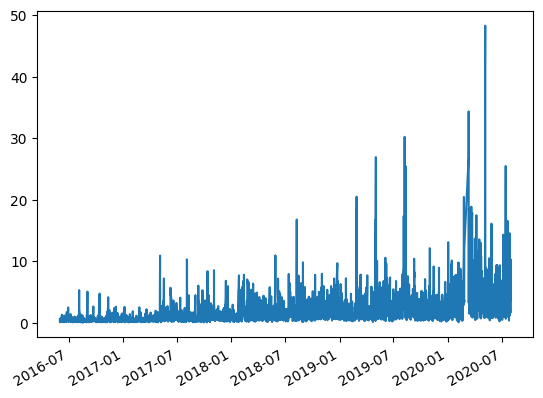

In [25]:
df_stock_trend['Stock Volatility'] = df_stock_trend['close'].ewm(alpha=0.5).mean()
df_stock_trend['Stock Volatility'] = df_stock_trend['Stock Volatility'].rolling(4).std()
df_stock_trend['Stock Volatility'].plot()

In [26]:
################################################################################################################################################################

In [27]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility

In [28]:
# Visualize the stock volatility



In [29]:
#############################################################################################################################################################################

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [30]:
df_stock_trend['close'].shift(1)

2016-06-01 09:00:00         NaN
2016-06-01 10:00:00     135.160
2016-06-01 11:00:00     136.630
2016-06-01 12:00:00     136.560
2016-06-01 13:00:00     136.420
                         ...   
2020-07-31 11:00:00    1098.770
2020-07-31 12:00:00    1105.780
2020-07-31 13:00:00    1087.925
2020-07-31 14:00:00    1095.800
2020-07-31 15:00:00    1110.650
Name: close, Length: 7067, dtype: float64

In [31]:
# Create a new column in the  DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_stock_trend['Hourly Stock Return'] = (df_stock_trend['close']-df_stock_trend['close'].shift(1))/df_stock_trend['close'].shift(1)

In [32]:
# View the first and last five rows of the  DataFrame
display(df_stock_trend.head())
display(df_stock_trend.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6,0,NaN,NaN
2016-06-01 10:00:00,136.63,12,6,NaN,0.010876
2016-06-01 11:00:00,136.56,22,12,NaN,-0.000512
2016-06-01 12:00:00,136.42,33,22,0.585666,-0.001025
2016-06-01 13:00:00,136.10,40,33,0.122387,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20,11,3.786327,0.006380
2020-07-31 12:00:00,1087.925,32,20,6.921543,-0.016147
2020-07-31 13:00:00,1095.800,41,32,5.494915,0.007239
2020-07-31 14:00:00,1110.650,47,41,4.794516,0.013552
2020-07-31 15:00:00,1122.510,53,47,7.729365,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [33]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_stock_trend[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.125327,0.030513
Lagged Search Trends,-0.125327,1.000000,0.017929
Hourly Stock Return,0.030513,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer: It doesn't appear that there is a strong correlation between
'Lagged Search Trends' and 'Stock Volatility', although it is worth pointing
out that whatever correlation does exist appears to be negative.**

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [34]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_prophet = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_prophet.rename(columns={'Date':'ds','Search Trends':'y'},inplace = True)

# Drop an NaN values from the prophet_df DataFrame
df_mercado_prophet.dropna(inplace = True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_prophet.head())
display(df_mercado_prophet.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [35]:
# Call the Prophet function, store as an object
prophet_model = Prophet()

In [36]:
# Fit the time-series model.
prophet_model.fit(df_mercado_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p8g6a8c/oypj33dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p8g6a8c/i0irgqbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20163', 'data', 'file=/tmp/tmp3p8g6a8c/oypj33dz.json', 'init=/tmp/tmp3p8g6a8c/i0irgqbb.json', 'output', 'file=/tmp/tmp3p8g6a8c/prophet_model34aamo1w/prophet_model-20240508151647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
# Create a future dataframe to hold predictions
df_prophecies = prophet_model.make_future_dataframe(periods = 2000,freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(df_prophecies.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [38]:
# Make the predictions for the trend data using the future_mercado_trends DataFram
df_predictions = prophet_model.predict(df_prophecies)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(df_predictions.head())
display(df_predictions.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.113083,98.107479,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,78.174215,94.492194,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.047656,84.464555,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.957215,69.306609,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.091599,52.160214,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,45.156308,31.245933,47.980783,44.151091,45.986282,-5.374670,-5.374670,-5.374670,-4.677999,...,-1.746932,-1.746932,-1.746932,1.050262,1.050262,1.050262,0.0,0.0,0.0,39.781638
39102,2020-11-30 05:00:00,45.155571,15.591808,33.676866,44.149895,45.986704,-20.845066,-20.845066,-20.845066,-20.514465,...,-1.385050,-1.385050,-1.385050,1.054449,1.054449,1.054449,0.0,0.0,0.0,24.310504
39103,2020-11-30 06:00:00,45.154834,4.307976,20.748632,44.148700,45.987126,-32.809997,-32.809997,-32.809997,-32.844569,...,-1.024028,-1.024028,-1.024028,1.058599,1.058599,1.058599,0.0,0.0,0.0,12.344836
39104,2020-11-30 07:00:00,45.154096,-3.506590,13.179623,44.147504,45.987492,-40.081405,-40.081405,-40.081405,-40.477990,...,-0.666127,-0.666127,-0.666127,1.062713,1.062713,1.062713,0.0,0.0,0.0,5.072692
39105,2020-11-30 08:00:00,45.153359,-5.404134,11.381058,44.146308,45.987827,-42.275539,-42.275539,-42.275539,-43.028773,...,-0.313554,-0.313554,-0.313554,1.066789,1.066789,1.066789,0.0,0.0,0.0,2.877820


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

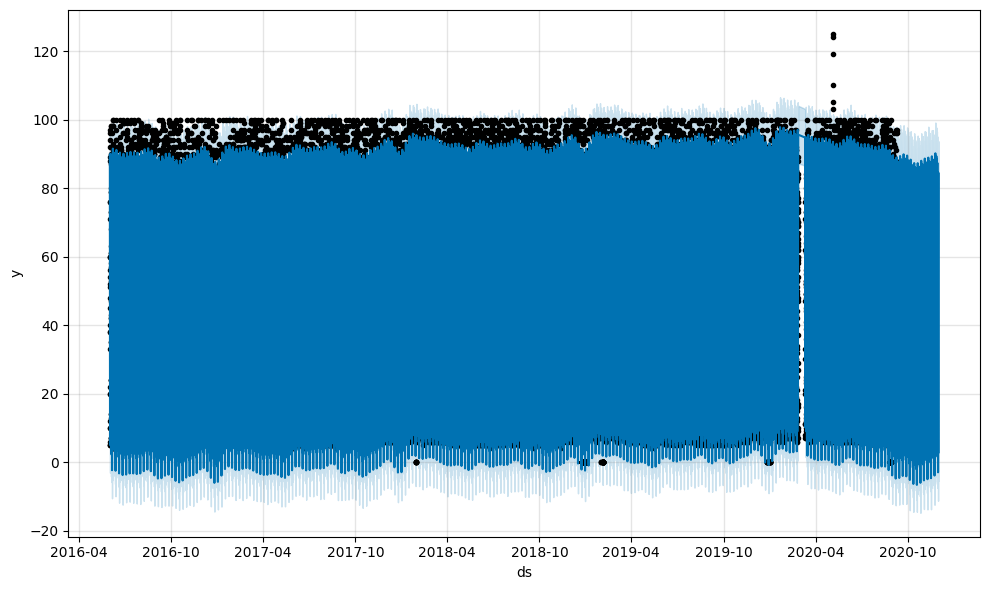

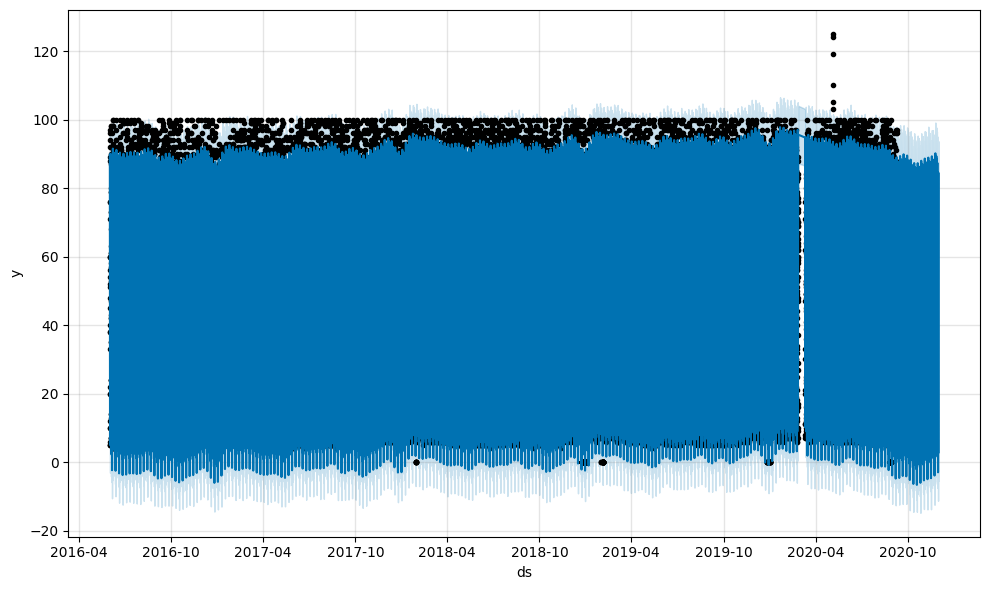

In [39]:
# Plot the Prophet predictions for the Mercado trends data
prophet_model.plot(df_predictions)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**


In [67]:
df_predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [90]:
df_daily_predictions = df_predictions[['ds','yhat','yhat_lower', 'yhat_upper','daily', 'daily_lower', 'daily_upper']]
df_daily_predictions.set_index('ds',inplace = True)

In [91]:
df_daily_predictions = df_daily_predictions['2020-10':]
df_daily_predictions.head()

,yhat,yhat_lower,yhat_upper,daily,daily_lower,daily_upper
ds,,,,,,
2020-10-01 00:00:00,88.069833,80.100409,96.497530,41.452703,41.452703,41.452703
2020-10-01 01:00:00,84.562178,75.847147,92.820397,37.943556,37.943556,37.943556
2020-10-01 02:00:00,74.270923,65.975519,83.628921,27.656646,27.656646,27.656646
2020-10-01 03:00:00,59.021317,50.179894,67.136160,12.417424,12.417424,12.417424
2020-10-01 04:00:00,41.909364,33.743813,50.225141,-4.677999,-4.677999,-4.677999


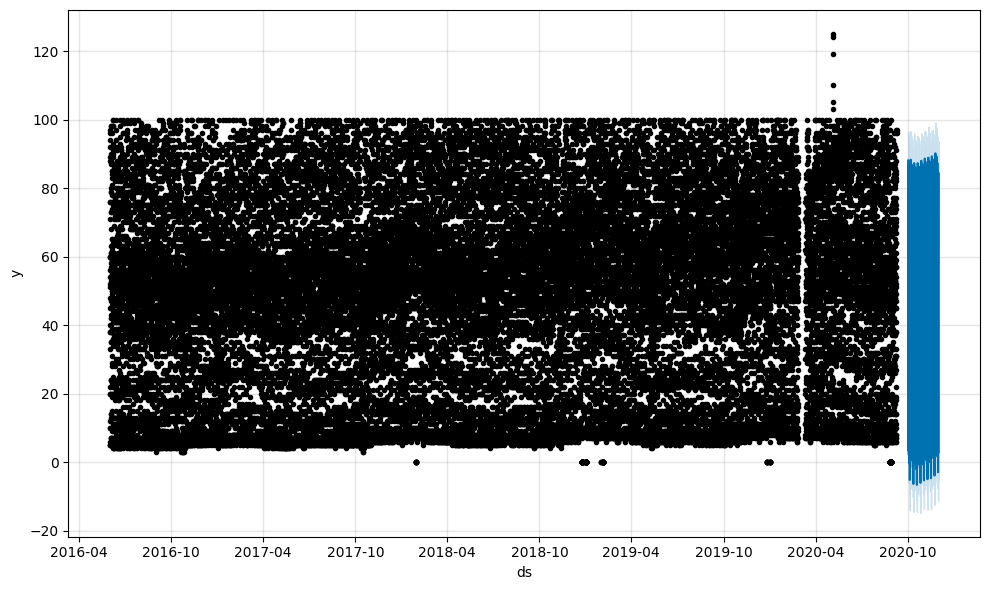

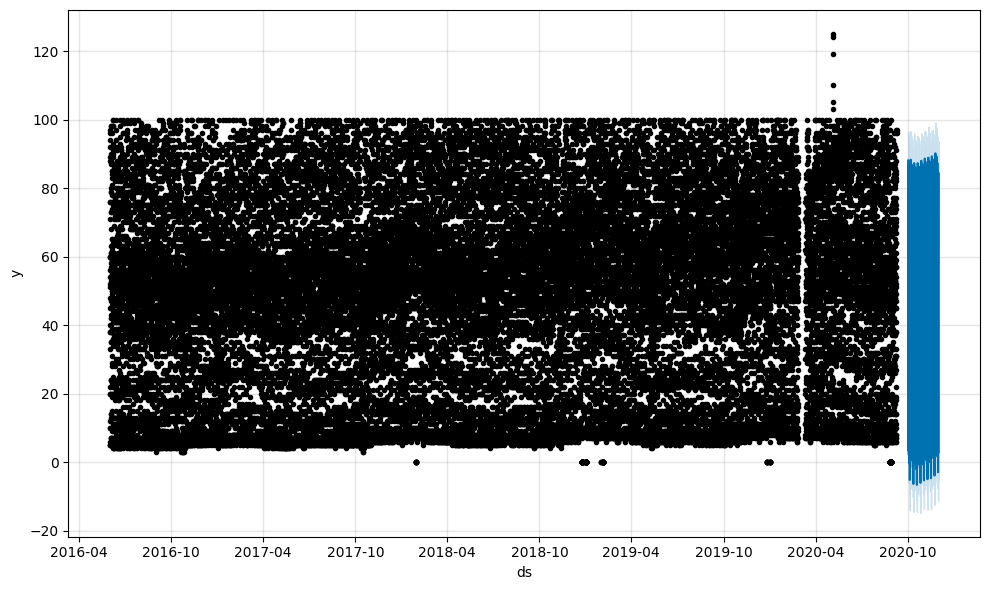

In [92]:
df_daily_predictions.reset_index(inplace=True)
prophet_model.plot(df_daily_predictions)

**We can see that in the near term towards the end of the data set there is a downward tendency**

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [40]:
df_predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.113083,98.107479,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,78.174215,94.492194,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.047656,84.464555,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.957215,69.306609,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.091599,52.160214,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


In [41]:
# Set the index in the DataFrame to the ds datetime column
df_predictions.set_index('ds',inplace = True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
df_predictions_subset= df_predictions[['yhat','yhat_lower','yhat_upper']]
df_predictions_subset.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.113083,98.107479
2016-06-01 01:00:00,86.075935,78.174215,94.492194
2016-06-01 02:00:00,75.753361,67.047656,84.464555
2016-06-01 03:00:00,60.487045,51.957215,69.306609
2016-06-01 04:00:00,43.373051,35.091599,52.160214


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [42]:
# From the DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

df_predictions_subset.tail()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.781638,31.245933,47.980783
2020-11-30 05:00:00,24.310504,15.591808,33.676866
2020-11-30 06:00:00,12.344836,4.307976,20.748632
2020-11-30 07:00:00,5.072692,-3.506590,13.179623
2020-11-30 08:00:00,2.877820,-5.404134,11.381058


In [43]:
#Starting index
date_index = df_predictions_subset[df_predictions_subset.index == '2020-11-30 08:00:00'].index

#Hours range
hours = pd.Timedelta(hours = 2000)

#Delta index
delta = date_index-hours
df_2000_hours = df_predictions_subset[f'{delta[0]}':'2020-11-30 08:00:00']

#Last 2000 hours df
df_2000_hours.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-09-08 00:00:00,88.982647,80.152213,97.929703
2020-09-08 01:00:00,85.527749,76.917918,93.674146
2020-09-08 02:00:00,75.275577,67.395689,84.245935
2020-09-08 03:00:00,60.052505,51.423379,67.924627
2020-09-08 04:00:00,42.955705,33.990982,51.332796


### **Visualization 2000 hours**

<Axes: xlabel='ds'>

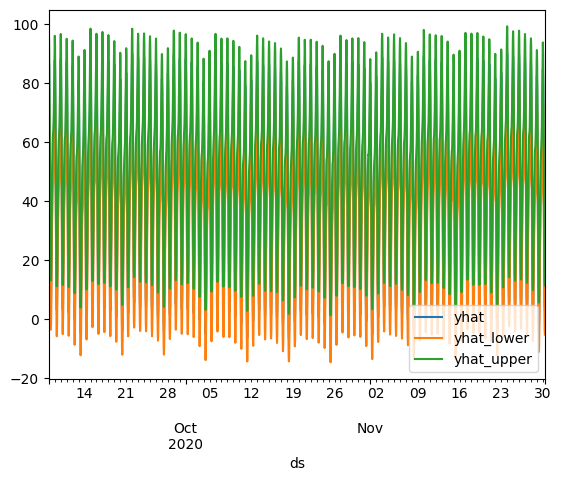

In [44]:
df_2000_hours.plot()

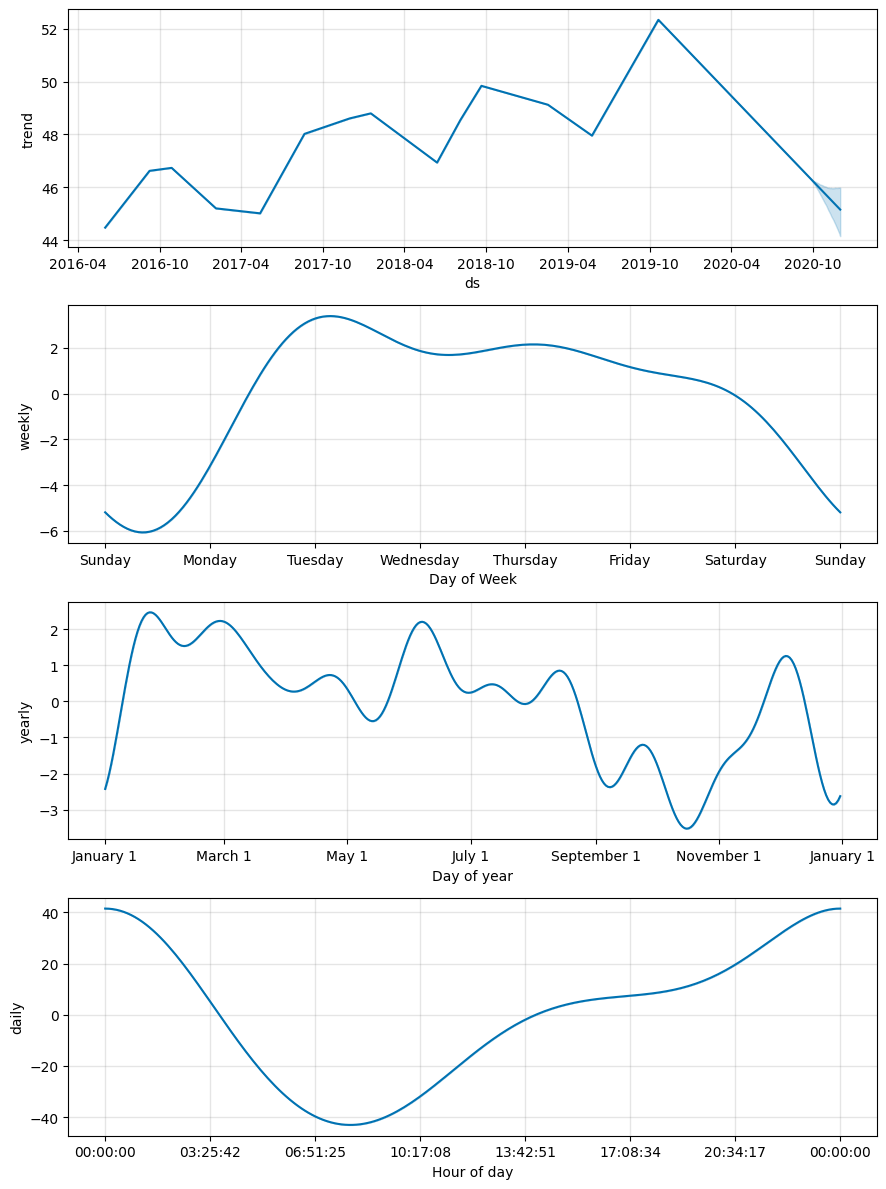

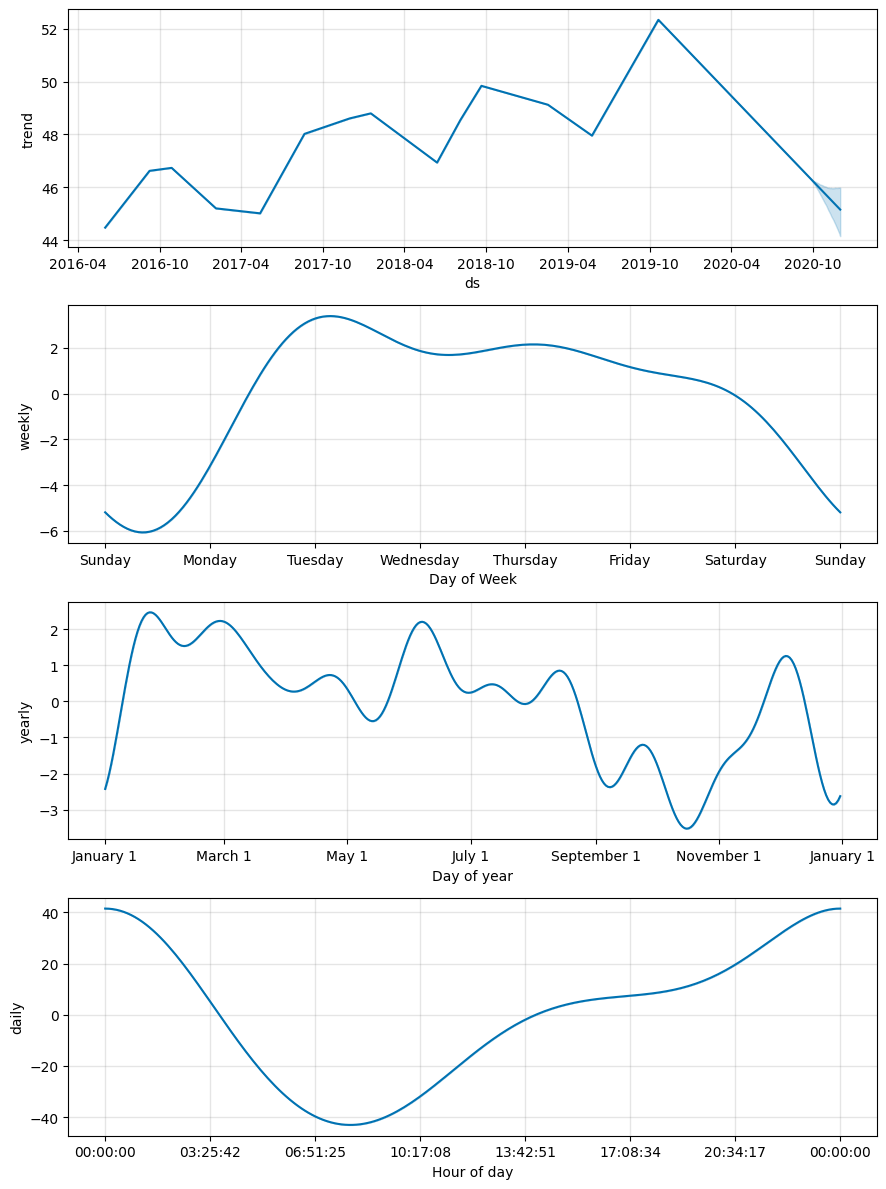

In [45]:
df_predictions.reset_index(inplace=True)
prophet_model.plot_components(df_predictions)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer: Midnight appears to be the time of day with the greatest popularity**

**Question:** Which day of week gets the most search traffic?
   
**Answer: Tuesdat seems to be that day with the most traffic**

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer: November suggests the lowest point in the calendar year**
